# Overview

In this section, we will take the [Gridded Monthly Temperature Anomaly Data](https://data.giss.nasa.gov/gistemp/) from 1880-present from GISTEMP and visualize the temperature anomaly for the year 2021.

## Setup and Data Download

The following blocks of code will install the required packages and download the datasets to your Colab environment.

In [13]:
%%capture
!apt-get -qq remove python-shapely python3-shapely

!pip install --no-binary shapely shapely --force
!pip install --no-binary cartopy cartopy==0.19.0.post1

In [2]:
import cartopy
import cartopy.crs as ccrs 
import os
import matplotlib.pyplot as plt
import xarray as xr

In [3]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [4]:
def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

filename = 'gistemp1200_GHCNv4_ERSSTv5.nc'
data_url = 'https://github.com/spatialthoughts/python-dataviz-web/raw/main/data/gistemp/'

download(data_url + filename)

Downloaded data/gistemp1200_GHCNv4_ERSSTv5.nc


## Data Pre-Processing

In [5]:
file_path = os.path.join(data_folder, filename)
ds = xr.open_dataset(file_path)

In [6]:
da = ds.tempanomaly

In [7]:
yearly = da.groupby('time.year').mean(dim='time')

## Plotting using Matplotlib

XArray provides a `plot()` method based on Matplotlib. When you call `plot()` on a 2D DataArray, it uses the `xarray.plot.pcolormesh()` function that creates a Pseudocolor plot.

Reference: [xarray.plot.pcolormesh](https://docs.xarray.dev/en/stable/generated/xarray.plot.pcolormesh.html#xarray.plot.pcolormesh)


In [8]:
anomaly2021 = yearly.sel(year=2021)
anomaly2021

<xarray.DataArray 'tempanomaly' (lat: 90, lon: 180)>
array([[-1.0675001, -1.0675001, -1.0675001, ..., -1.0675001, -1.0675001,
        -1.0675001],
       [-1.0675001, -1.0675001, -1.0675001, ..., -1.0675001, -1.0675001,
        -1.0675001],
       [-1.0675001, -1.0675001, -1.0675001, ..., -1.0675001, -1.0675001,
        -1.0675001],
       ...,
       [ 3.7291667,  3.7291667,  3.7291667, ...,  3.7291667,  3.7291667,
         3.7291667],
       [ 3.7291667,  3.7291667,  3.7291667, ...,  3.7291667,  3.7291667,
         3.7291667],
       [ 3.7291667,  3.7291667,  3.7291667, ...,  3.7291667,  3.7291667,
         3.7291667]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
    year     int64 2021

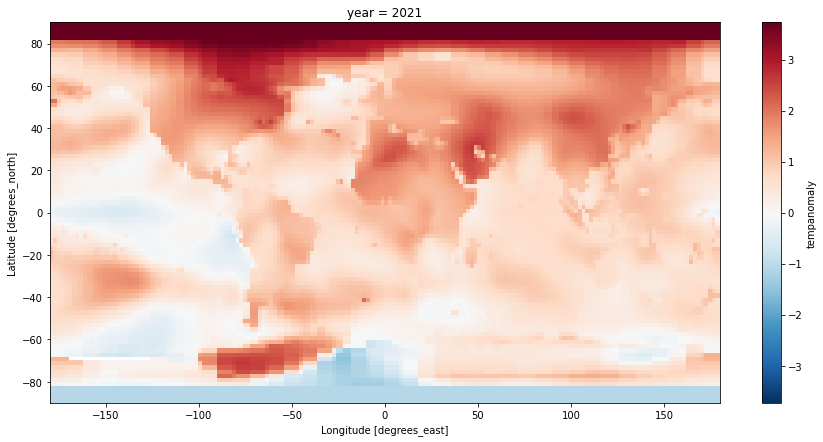

In [9]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 7)
anomaly2021.plot(ax=ax)
plt.show()

We can customize the plot using Matplotlib's options.

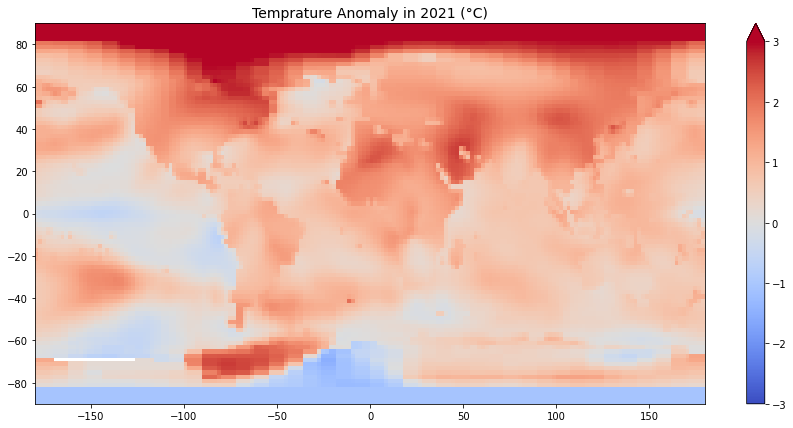

In [10]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 7)

anomaly2021.plot(ax=ax,
    vmin=-3, vmax=3, add_labels=False, cmap='coolwarm')

ax.set_title('Temprature Anomaly in 2021 (°C)', fontsize = 14)

plt.show()

## Plotting using CartoPy

To create more informative map visualization, we need to reproject this grid to another projection. CartoPy supports a wide range of projections and can plot them using matplotlib. CartoPy creates a GeoAxes object and replaces the default Axes with it. This allows you to plot the data on a specified projection.

Reference: [CartoPy List of Projections](https://scitools.org.uk/cartopy/docs/latest/reference/crs.html?highlight=list#list-of-projections)

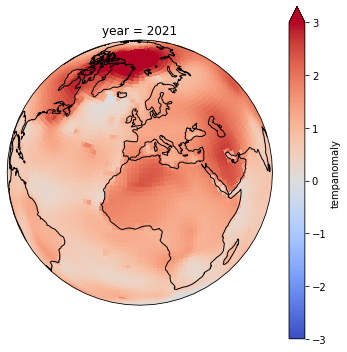

In [15]:
ax = plt.axes(projection=ccrs.Orthographic(0, 30))
ax.coastlines()
anomaly2021.plot(ax=ax,
    vmin=-3, vmax=3, cmap='coolwarm',
    transform=ccrs.PlateCarree())

fig = plt.gcf()
fig.set_size_inches(5,5)
plt.tight_layout()
plt.show()

We can further customize the map by adjusting the colorbar. 

Reference: [matplotlib.pyplot.colorbar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html)

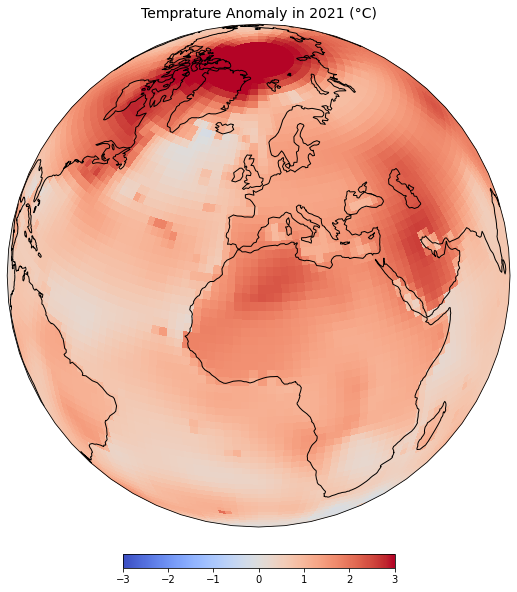

In [17]:
cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.025,
    'pad': 0.05,
    'extend':'neither'
}

ax = plt.axes(projection=ccrs.Orthographic(0, 30))
ax.coastlines()
anomaly2021.plot(
    ax=ax,
    vmin=-3, vmax=3, cmap='coolwarm',
    transform=ccrs.PlateCarree(),
    add_labels=False,
    cbar_kwargs=cbar_kwargs)

fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Temprature Anomaly in 2021 (°C)', fontsize = 14)

output_folder = 'output'
output_path = os.path.join(output_folder, 'anomaly.jpg')
plt.savefig(output_path, dpi=300)
plt.show()

## Exercise

Display the map in the Robinson projection.